In [54]:
#importo le librerie
import pandas as pd
import numpy as np
import re
#data visualization
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from scipy.stats import norm
from matplotlib.dates import DateFormatter, AutoDateLocator

In [55]:
#DATA EXPLORATION AND CLEANING
#leggo il database
dtfashion=pd.read_csv('fashion.csv')
dtfashion.copy()
dtfashion.head(7)

,user_uuid,category,designer_id,language,level,country,purchase_date,platform,item_id,stars,subscription_date
0,183,belt,120,en,cheap,uk,13-7-2022,android,3521,1,20-8-2021
1,134,underwear,102,it,cheap,it,2-5-2023,android,6239,2,20-11-2022
2,158,belt,106,it,cheap,it,6-8-2021,pc,3618,3,18-3-2020
3,82,shoes,102,it,premium,it,18-7-2023,android,5281,4,21-1-2022
4,201,shoes,113,en,average,uk,7-5-2023,android,5260,1,25-11-2022
5,191,dress,119,en,cheap,uk,23-2-2023,pc,7542,5,15-5-2021
6,181,belt,121,en,premium,uk,5-11-2022,apple,3237,2,9-12-2020


In [56]:
#DATA EXPLORATION
#mostro il numero di righe del dataset e il numero di colonne
dtfashion.shape

(999, 11)

In [57]:
#restituisco i nomi delle colonne presenti in quel frame di dati
dtfashion.columns

Index(['user_uuid', 'category', 'designer_id', 'language', 'level', 'country',
       'purchase_date', 'platform', 'item_id', 'stars', 'subscription_date'],
      dtype='object')

In [58]:
#controllo i nomi delle colonne e i tipi di dati che sono all'interno
dtfashion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_uuid          999 non-null    int64 
 1   category           999 non-null    object
 2   designer_id        999 non-null    int64 
 3   language           999 non-null    object
 4   level              999 non-null    object
 5   country            999 non-null    object
 6   purchase_date      999 non-null    object
 7   platform           999 non-null    object
 8   item_id            999 non-null    int64 
 9   stars              999 non-null    int64 
 10  subscription_date  999 non-null    object
dtypes: int64(4), object(7)
memory usage: 86.0+ KB


In [59]:
#sintesi descrittiva dei dati statistici come media e std dei valori numerici della serie
dtfashion.describe()

,user_uuid,designer_id,item_id,stars
count,999.000000,999.000000,999.000000,999.000000
mean,126.206206,110.769770,4032.721722,3.013013
std,68.581911,6.623049,2266.843497,1.415216
min,1.000000,100.000000,26.000000,1.000000
25%,69.000000,105.000000,2248.000000,2.000000
50%,128.000000,111.000000,3662.000000,3.000000
75%,183.500000,116.000000,5972.500000,4.000000
max,245.000000,122.000000,11000.000000,5.000000


In [60]:
#visualizzo le correlazioni dei valori numerici in base Int64
correlazioneintsessquattro = dtfashion[['user_uuid', 'designer_id', 'item_id', 'stars']].corr()
correlazioneintsessquattro

,user_uuid,designer_id,item_id,stars
user_uuid,1.000000,0.015529,0.004009,-0.002815
designer_id,0.015529,1.000000,-0.032776,-0.017212
item_id,0.004009,-0.032776,1.000000,-0.002449
stars,-0.002815,-0.017212,-0.002449,1.000000


In [61]:
#analizzo e sommo i valori nulli in tabella
totale_conto_null = dtfashion.isnull().sum()
#calcolo il numero totale dei valori in ogni colonna
totale_conto = dtfashion.shape[0]
#calcolo la percetuali dei valori nulli in ogni colonna
totale_conto_null_perc=((totale_conto_null/totale_conto)*100).round(2).astype(str)+'%'
#creo un nuovo dataframe che contiene i risultati dei valori nulli e la percetuale
dataset_null_info = pd.DataFrame({'N. Null' : totale_conto_null,'% Null' : totale_conto_null_perc})
dataset_null_info

,N. Null,% Null
user_uuid,0,0.0%
category,0,0.0%
designer_id,0,0.0%
language,0,0.0%
level,0,0.0%
country,0,0.0%
purchase_date,0,0.0%
platform,0,0.0%
item_id,0,0.0%
stars,0,0.0%


<h3>Informazioni sul dataset dtfashion</h3>
<p>Nel dataset ci sono 11 Colonne e 999 Righe e nello specifico le colonne sono:</p>
<ol>
    <li><b>user_uuid:</b> identificativo dell’utente che vende, tipo di dato è un numero intero ed è compreso tra 1 e 245</li>
    <li><b>category:</b> categoria di abbigliamento e tipo di dato oggetto</li>
    <li><b>designer_id:</b>identificativo del designer, tipo di dato è un numero intero ed è compreso tra 100 e 122</li>
    <li><b>language:</b> lingua dell’utente che vende e tipo di dato oggetto</li>
    <li><b>level:</b> fascia di prezzo e tipo di dato oggetto</li>
    <li><b>country:</b> nazionalità dell’utente che vende e tipo di dato oggetto</li>
    <li><b>purchase_date:</b> data in cui l’utente ha venduto il prodotto e tipo di dato oggetto</li>
    <li><b>platform:</b> piattaforma da cui è stato fatto il pagamento e tipo di dato oggetto</li>
    <li><b>item_id:</b> identificativo del prodotto, tipo di dato è un numero intero ed è compreso tra 26 e 11000</li>
    <li><b>stars:</b> stelle medie assegnate al prodotto, tipo di dato è un numero intero ed è compreso tra 1 e 5</li>
    <li><b>subscription_date:</b> data in cui l’utente che vende si è iscritto e tipo di dato oggetto</li>
</ol>
<p>Come mostrato nell'analisi del dataset nessun dato è nullo, ovvero tutti i record del dataset sono riempiti correttamente e non manca nessun dato.</p>

In [62]:
#definisco la funzione che estrare l'anno da una stringa utilizzando l'espressione regolare
def estrai_anno_da_str (text):
    #utilizzo la funzione findall per restituisce un elenco di tutte le corrispondenze della regex in text
    year = re.findall(r"(\d{4})",text)
    if year:
        #restituisco il primo elemento con indice 0 di year
        return int(year[0])
    else:
        return None

#richiamo la funzione con il campo purchase_date per estrarre l'anno
dtfashion['purchase_year'] = dtfashion['purchase_date'].apply(estrai_anno_da_str)
#creo la colonna purchase_year e inserisco il valore trovato
dtfashion['purchase_year'].fillna(0, inplace=True)
#applico alla colonna purchase year tipo di dato int
dtfashion['purchase_year'] = dtfashion['purchase_year'].astype(int)

#richiamo la funzione con il campo subscription_date per estrarre l'anno
dtfashion['subscription_year'] = dtfashion['subscription_date'].apply(estrai_anno_da_str)
#creo la colonna purchase_year e inserisco il valore trovato
dtfashion['subscription_year'].fillna(0, inplace=True)
#applico alla colonna subscription year tipo di dato int
dtfashion['subscription_year'] = dtfashion['subscription_year'].astype(int)


dtfashion

,user_uuid,category,designer_id,language,level,country,purchase_date,platform,item_id,stars,subscription_date,purchase_year,subscription_year
0,183,belt,120,en,cheap,uk,13-7-2022,android,3521,1,20-8-2021,2022,2021
1,134,underwear,102,it,cheap,it,2-5-2023,android,6239,2,20-11-2022,2023,2022
2,158,belt,106,it,cheap,it,6-8-2021,pc,3618,3,18-3-2020,2021,2020
3,82,shoes,102,it,premium,it,18-7-2023,android,5281,4,21-1-2022,2023,2022
4,201,shoes,113,en,average,uk,7-5-2023,android,5260,1,25-11-2022,2023,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,3,belt,104,fr,average,fr,7-6-2023,android,3791,2,22-7-2020,2023,2020
995,81,shoes,101,it,premium,it,10-11-2023,android,587,2,23-8-2022,2023,2022
996,173,activewear,101,fr,premium,fr,22-11-2023,android,6882,2,12-12-2021,2023,2021
997,41,belt,109,fr,cheap,fr,12-12-2023,android,3558,5,1-8-2021,2023,2021


In [63]:
#definisco la funzione che estrare il quarter dal purchase date utilizzando l'espressione regolare
def extract_yearquarter_from_date (text):
    q=''
    #regex che descrive 4 numeri con uno spazio bianco prima e uno spazio bianco dopo
    date_regex = r"-(\d+)-"  # Capture month as a digit group
    date_regex1 = r"-(\d{4})"
    match = re.search(date_regex, text)
    match1 = re.search(date_regex1, text)
    if match:
        month = match.group(1)  # Extract the captured group (month)
        year = match1.group(1)  # Extract the captured group (month)
        intmonth = int(month)
        if (intmonth < 4):
            q =f"{year} Q1" 
        elif (intmonth < 7):
            q =f"{year} Q2"
        elif (intmonth < 10):
            q =f"{year} Q3"
        else:
            q =f"{year} Q4"
        return q
    else:
        return None

#richiamo la funzione con il campo title per estrarre l'anno
dtfashion['yquarter_purchase'] = dtfashion['purchase_date'].apply(extract_yearquarter_from_date)
#applico alla colonna year tipo di dato int
dtfashion['yquarter_purchase'] = dtfashion['yquarter_purchase'].astype(str)

dtfashion


,user_uuid,category,designer_id,language,level,country,purchase_date,platform,item_id,stars,subscription_date,purchase_year,subscription_year,yquarter_purchase
0,183,belt,120,en,cheap,uk,13-7-2022,android,3521,1,20-8-2021,2022,2021,2022 Q3
1,134,underwear,102,it,cheap,it,2-5-2023,android,6239,2,20-11-2022,2023,2022,2023 Q2
2,158,belt,106,it,cheap,it,6-8-2021,pc,3618,3,18-3-2020,2021,2020,2021 Q3
3,82,shoes,102,it,premium,it,18-7-2023,android,5281,4,21-1-2022,2023,2022,2023 Q3
4,201,shoes,113,en,average,uk,7-5-2023,android,5260,1,25-11-2022,2023,2022,2023 Q2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,3,belt,104,fr,average,fr,7-6-2023,android,3791,2,22-7-2020,2023,2020,2023 Q2
995,81,shoes,101,it,premium,it,10-11-2023,android,587,2,23-8-2022,2023,2022,2023 Q4
996,173,activewear,101,fr,premium,fr,22-11-2023,android,6882,2,12-12-2021,2023,2021,2023 Q4
997,41,belt,109,fr,cheap,fr,12-12-2023,android,3558,5,1-8-2021,2023,2021,2023 Q4


In [64]:
#calcolo numero utenti unici nel dataset dtfashion
n_utenti_unici = dtfashion['user_uuid'].nunique()
n_utenti_unici

241

In [65]:
#analizzo e sommo i valori nulli in tabella
totale_conto_null = dtfashion.isnull().sum()
#calcolo il numero totale dei valori in ogni colonna
totale_conto = dtfashion.shape[0]
#calcolo la percetuali dei valori nulli in ogni colonna
totale_conto_null_perc=((totale_conto_null/totale_conto)*100).round(2).astype(str)+'%'
#creo un nuovo dataframe che contiene i risultati dei valori nulli e la percetuale
dataset_null_info = pd.DataFrame({'N. Null' : totale_conto_null,'% Null' : totale_conto_null_perc})
dataset_null_info

,N. Null,% Null
user_uuid,0,0.0%
category,0,0.0%
designer_id,0,0.0%
language,0,0.0%
level,0,0.0%
country,0,0.0%
purchase_date,0,0.0%
platform,0,0.0%
item_id,0,0.0%
stars,0,0.0%


<h3>Cleaning del dataset dtfashion</h3>
<p>Nel dataset sono state aggiunte 2 colonne utili per l'analisi e la visualizzazione dei dati, nello specifico le colonne sono:</p>
<ol>
    <li><b>purchase_year:</b> anno di vendita del prodotto e tipo di dato è un oggetto</li>
    <li><b>subscribe_year:</b> anno di iscrizione alla piattaforma di vendita e tipo di dato è un oggetto</li>
</ol>
<p>Quindi dopo aver aggiunto le colonne, il dataset a 999 righe e 13 colonne, con nessun dato nullo o undefined.</p>

In [66]:
#DATA ANALYSIS AND VISUALISATION
#calcolo in numero di vendite per ogni anno
vendite_per_anno = dtfashion['yquarter_purchase'].value_counts()
vendite_per_anno_asc = vendite_per_anno.sort_values(ascending=True)
vendite_per_anno_asc

yquarter_purchase
2021 Q2     19
2021 Q1     23
2021 Q3     25
2021 Q4     26
2022 Q3     71
2022 Q1     73
2022 Q4     76
2022 Q2     88
2023 Q2    137
2023 Q4    144
2023 Q1    150
2023 Q3    167
Name: count, dtype: int64

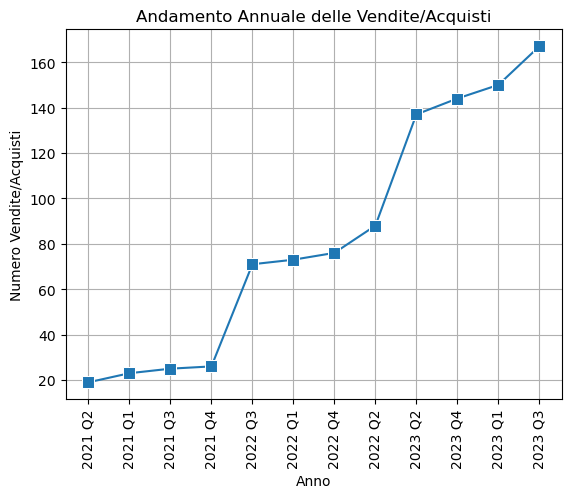

In [67]:
#creo il grafico a linee per mostrare l'andamento annuale delle vendite
line_plot = sns.lineplot(x=vendite_per_anno_asc.index, y=vendite_per_anno_asc.values, marker='s', markersize=8)

plt.xlabel('Anno')
plt.ylabel('Numero Vendite/Acquisti')
plt.title('Andamento Annuale delle Vendite/Acquisti')


plt.xticks(rotation=90)
plt.grid(True)
plt.show()

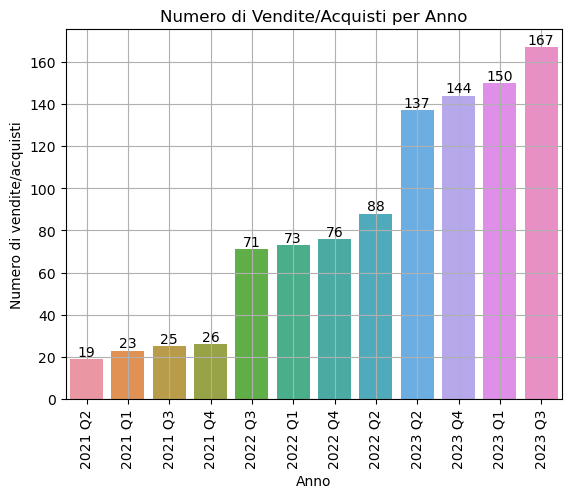

In [68]:
#visualizzo le vendite raggruppate per anno utilizzando un grafico a barre
bar_plot = sns.barplot(x=vendite_per_anno_asc.index, y=vendite_per_anno_asc.values)
plt.xlabel('Anno')
plt.ylabel('Numero di vendite/acquisti')
plt.title('Numero di Vendite/Acquisti per Anno')
plt.grid(True)
plt.xticks(rotation=90)
for index, value in enumerate(vendite_per_anno_asc.values):
    bar_plot.text(index, value, str(value), ha='center', va='bottom')
plt.show()

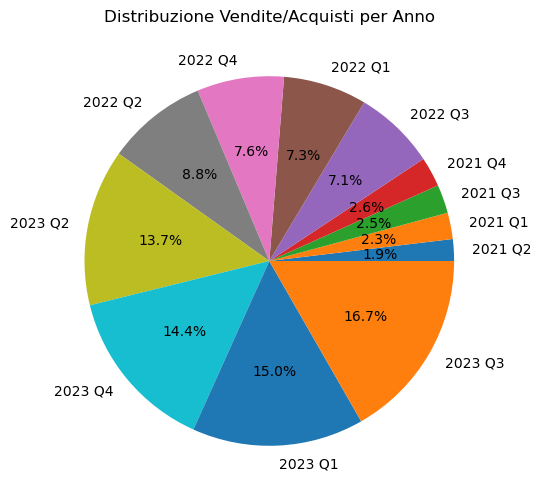

In [69]:
#creo il grafico a torta sulle vendite raggruppate per anno
plt.figure(figsize=(10, 6))
plt.pie(vendite_per_anno_asc.values, labels=vendite_per_anno_asc.index, autopct='%1.1f%%')
plt.title('Distribuzione Vendite/Acquisti per Anno')
plt.show()

In [70]:
#calcolo il numero di acquisti per ogni piattaforma
acquisti_per_piattaforma = dtfashion['platform'].value_counts()
acquisti_per_piattaforma

platform
android    458
pc         330
apple      211
Name: count, dtype: int64

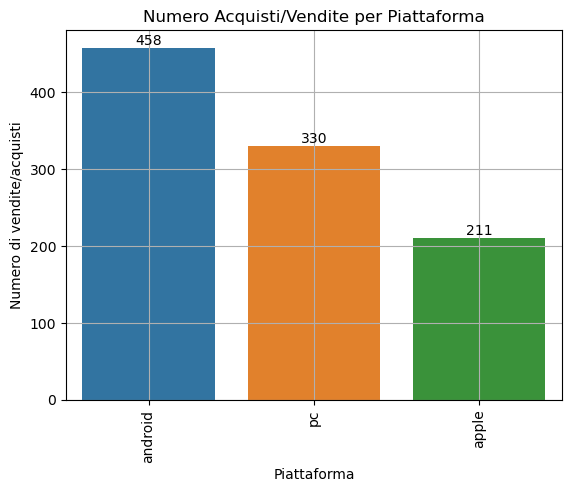

In [71]:
#calcolo il numero di acquisti per ogni piattaforma
bar_plot = sns.barplot(x=acquisti_per_piattaforma.index, y=acquisti_per_piattaforma.values)
plt.xlabel('Piattaforma')
plt.ylabel('Numero di vendite/acquisti')
plt.title('Numero Acquisti/Vendite per Piattaforma')
plt.grid(True)
plt.xticks(rotation=90)
for index, value in enumerate(acquisti_per_piattaforma.values):
    bar_plot.text(index, value, str(value), ha='center', va='bottom')
plt.show()

In [72]:
#calcolo in numero di vendite per ogni categoria prodotto
vendite_per_cate = dtfashion['category'].value_counts()
vendite_per_cate

category
belt          339
shoes         165
bottom        135
dress         128
activewear     93
shirt          82
underwear      57
Name: count, dtype: int64

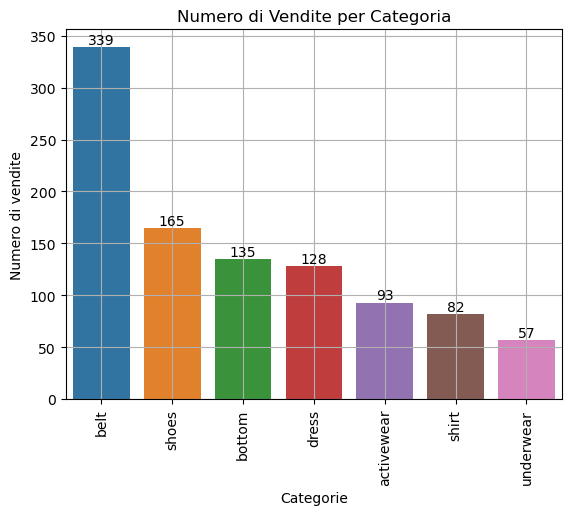

In [73]:
#visualizzo queste vendite utilizzando un grafico a barre
bar_plot = sns.barplot(x=vendite_per_cate.index, y=vendite_per_cate.values)
plt.xlabel('Categorie')
plt.ylabel('Numero di vendite')
plt.title('Numero di Vendite per Categoria')
plt.grid(True)
plt.xticks(rotation=90)
for index, value in enumerate(vendite_per_cate.values):
    bar_plot.text(index, value, str(value), ha='center', va='bottom')
plt.show()

In [74]:
#calcolo la media delle stelle assegnate ai prodotti raggruppati per categoria prodotto
media_stelle_per_cate = dtfashion.groupby('category')['stars'].mean()
media_stelle_per_cate_desc = media_stelle_per_cate.sort_values(ascending=False)
media_stelle_per_cate_desc

category
belt          3.103245
shoes         3.072727
underwear     3.052632
bottom        2.985185
dress         2.976562
activewear    2.849462
shirt         2.780488
Name: stars, dtype: float64

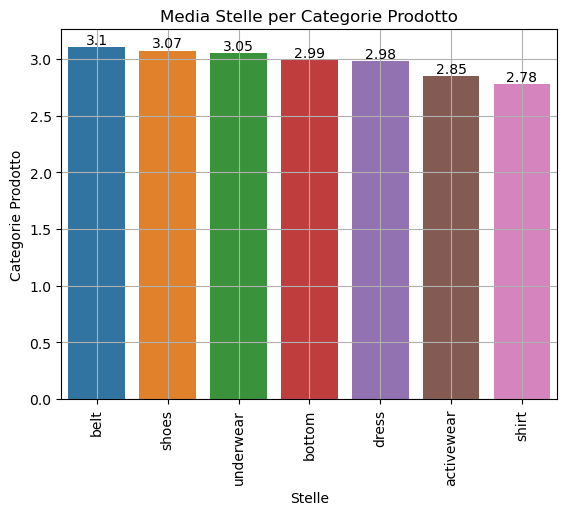

In [75]:
#creo il grafico a barre per mostrare la media di stelle assegnata ad ogni categoria prodotto
bar_plot = sns.barplot(x=media_stelle_per_cate_desc.index, y=media_stelle_per_cate_desc.values)
plt.xlabel('Stelle')
plt.ylabel('Categorie Prodotto')
plt.title('Media Stelle per Categorie Prodotto')
plt.xticks(rotation=90)
plt.grid(True)
for index, value in enumerate(media_stelle_per_cate_desc.values):
    bar_plot.text(index, value, s=round(value, 2), ha='center', va='bottom')
plt.show()

In [76]:
#calcolo in numero di prodotti raggruppandoli per la fascia di prezzo corrispondente
prodotti_per_livello_prezzo = dtfashion['level'].value_counts()
prodotti_per_livello_prezzo

level
premium    433
cheap      332
average    234
Name: count, dtype: int64

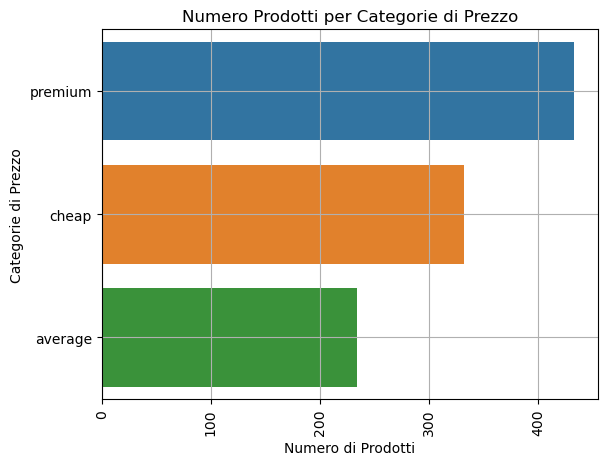

In [77]:
#creo il grafico a barre sul raggruppamento dei prodotti per fascia di prezzo di appartenenza
bar_plot = sns.barplot(x=prodotti_per_livello_prezzo.values, y=prodotti_per_livello_prezzo.index)
plt.xlabel('Numero di Prodotti')
plt.ylabel('Categorie di Prezzo')
plt.title('Numero Prodotti per Categorie di Prezzo')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

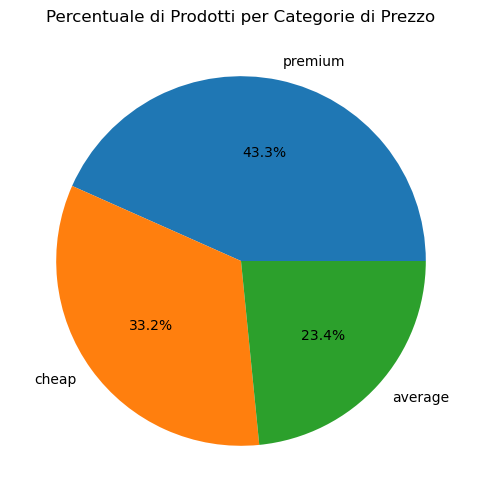

In [78]:
#creo il grafico a torta sul raggruppamento dei prodotti per fascia di prezzo di appartenenza
plt.figure(figsize=(10, 6))
plt.pie(prodotti_per_livello_prezzo.values, labels=prodotti_per_livello_prezzo.index, autopct='%1.1f%%')
plt.title('Percentuale di Prodotti per Categorie di Prezzo')
plt.show()

In [79]:
#calcolo la media delle stelle assegnate ai prodotti raggruppati per categoria prezzo
media_stelle_per_cprezzo = dtfashion.groupby('level')['stars'].mean()
media_stelle_per_cprezzo_desc = media_stelle_per_cprezzo.sort_values(ascending=False)
media_stelle_per_cprezzo_desc

level
average    3.047009
cheap      3.042169
premium    2.972286
Name: stars, dtype: float64

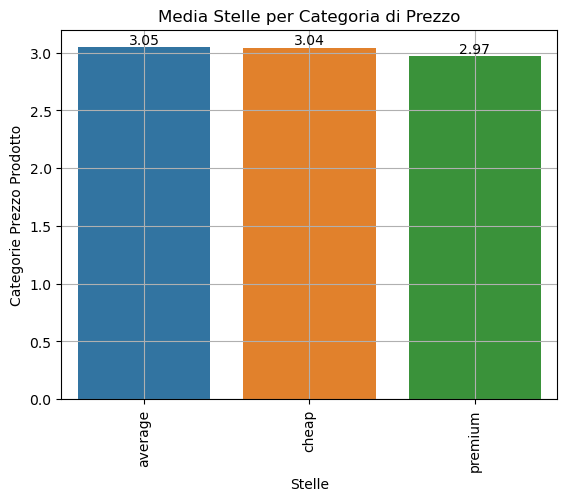

In [80]:
#creo il grafico a linee per mostrare la media di stelle assegnata ad ogni categoria prezzo
bar_plot = sns.barplot(x=media_stelle_per_cprezzo_desc.index, y=media_stelle_per_cprezzo_desc.values)
plt.xlabel('Stelle')
plt.ylabel('Categorie Prezzo Prodotto')
plt.title('Media Stelle per Categoria di Prezzo')
plt.xticks(rotation=90)
plt.grid(True)
for index, value in enumerate(media_stelle_per_cprezzo_desc.values):
    bar_plot.text(index, value, s=round(value, 2), ha='center', va='bottom')
plt.show()

In [81]:
#calcolo il numero di iscrizioni per ogni anno
iscrizioni_per_anno = dtfashion['subscription_year'].value_counts()
iscrizioni_per_anno

subscription_year
2021    415
2020    293
2022    291
Name: count, dtype: int64

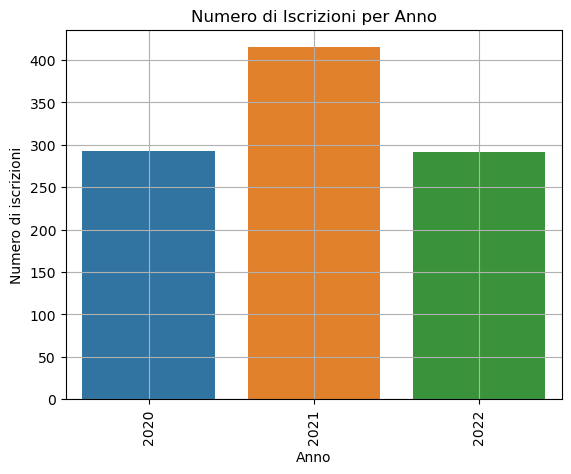

In [82]:
#visualizzo le iscrizioni raggruppate per anno utilizzando un grafico a barre
bar_plot = sns.barplot(x=iscrizioni_per_anno.index, y=iscrizioni_per_anno.values)
plt.xlabel('Anno')
plt.ylabel('Numero di iscrizioni')
plt.title('Numero di Iscrizioni per Anno')
plt.grid(True)
plt.xticks(rotation=90)
plt.show()

In [83]:
#calcolo in numero di persone raggruppandole per paese di provenienza
persone_per_paese = dtfashion['country'].value_counts()
persone_per_paese

country
it    451
uk    337
fr    211
Name: count, dtype: int64

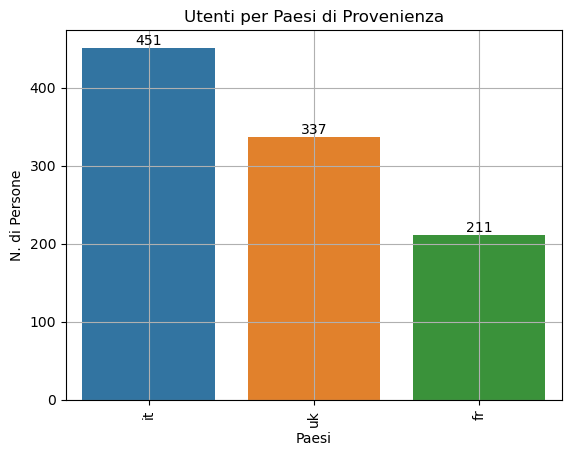

In [84]:
#creo il grafico a barre sul raggruppamento delle persone per paese di provenienza
bar_plot = sns.barplot(x=persone_per_paese.index, y=persone_per_paese.values)
plt.xlabel('Paesi')
plt.ylabel('N. di Persone')
plt.title('Utenti per Paesi di Provenienza')
plt.grid(True)
plt.xticks(rotation=90)
for index, value in enumerate(persone_per_paese.values):
    bar_plot.text(index, value, str(value), ha='center', va='bottom')

plt.show()

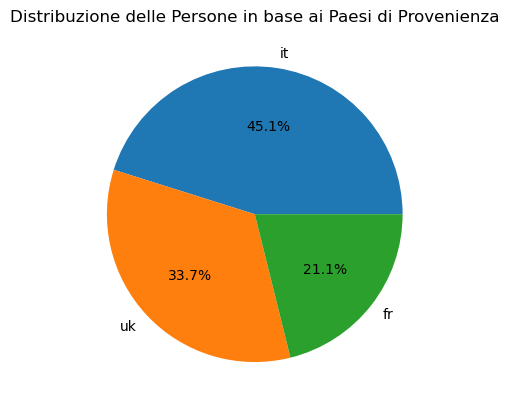

In [85]:
#creo il grafico a torta sul raggruppamento degli utenti per paese di provenienza
pie_chart = plt.pie(persone_per_paese.values, labels=persone_per_paese.index, autopct='%1.1f%%')
plt.title('Distribuzione delle Persone in base ai Paesi di Provenienza')
plt.show()

In [86]:
#calcolo la media delle stelle assegnate alle vendite raggruppate per paese di provenienza dello user
media_stelle_per_cprezzo = dtfashion.groupby('country')['stars'].mean()
media_stelle_per_cprezzo_desc = media_stelle_per_cprezzo.sort_values(ascending=False)
media_stelle_per_cprezzo_desc

country
uk    3.136499
fr    3.080569
it    2.889135
Name: stars, dtype: float64

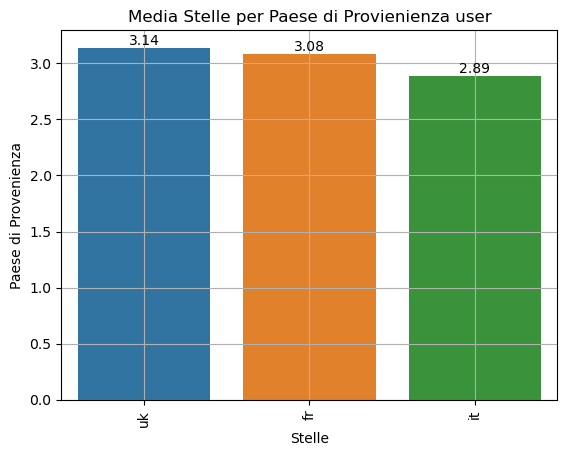

In [87]:
#creo il grafico a barre per mostrare la media di stelle assegnata ad ogni categoria prezzo
bar_plot = sns.barplot(x=media_stelle_per_cprezzo_desc.index, y=media_stelle_per_cprezzo_desc.values)
plt.xlabel('Stelle')
plt.ylabel('Paese di Provenienza')
plt.title('Media Stelle per Paese di Provienienza user')
plt.xticks(rotation=90)
plt.grid(True)
for index, value in enumerate(media_stelle_per_cprezzo_desc.values):
    bar_plot.text(index, value, s=round(value, 2), ha='center', va='bottom')
plt.show()


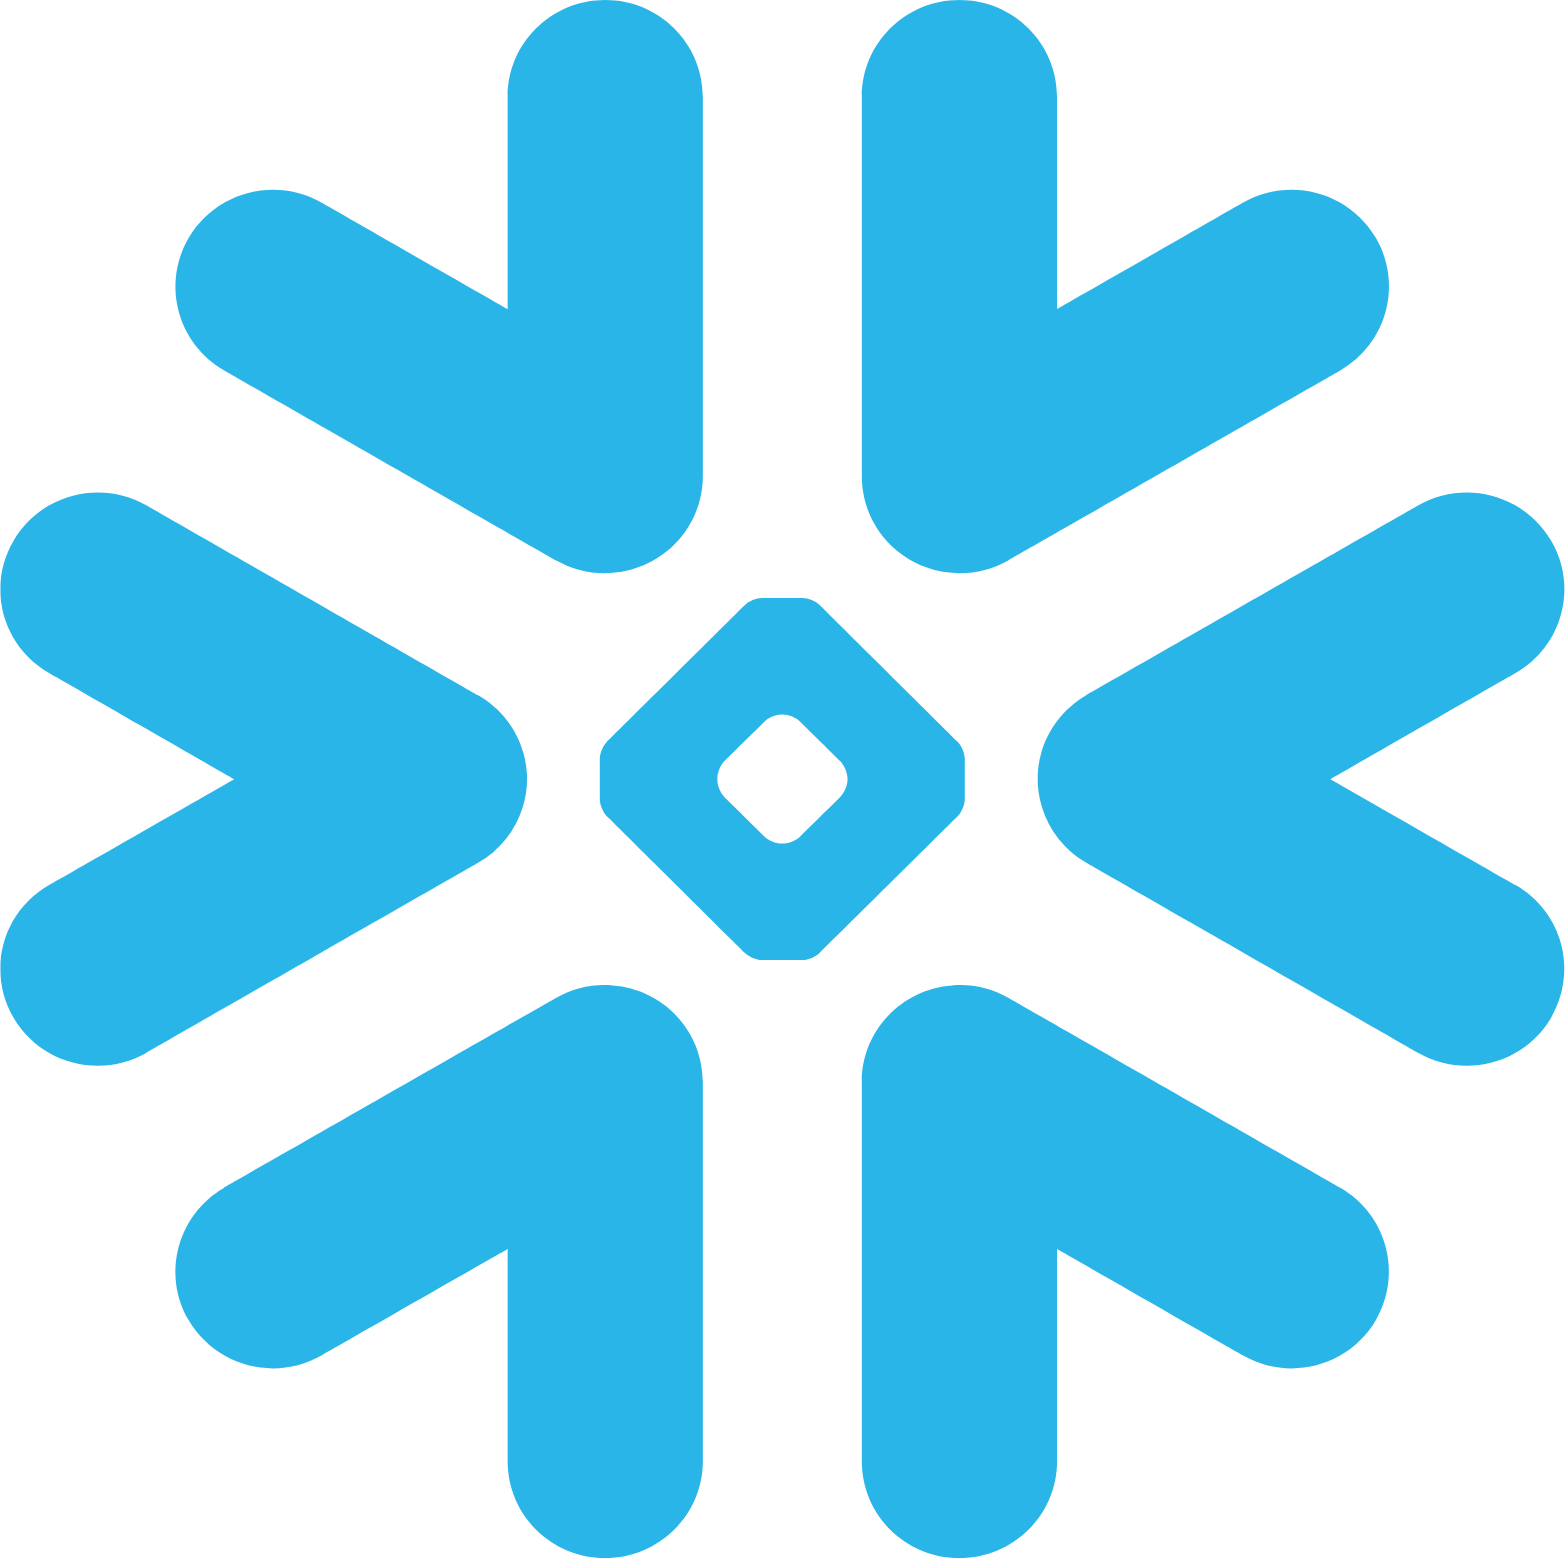

In [91]:
#IMPORTO LA LIBRERIA MITOSHEET
import mitosheet
mitosheet.sheet(analysis_to_replay="id-yjzbxjcdfv")

In [95]:
from mitosheet.public.v3 import *; register_analysis("id-yjzbxjcdfv");
import pandas as pd

# Imported fashion.csv, fashion.csv, fashion.csv
fashion = pd.read_csv(r'fashion.csv')
fashion_1 = pd.read_csv(r'fashion.csv')
fashion_2 = pd.read_csv(r'fashion.csv')

# Changed subscription_date to dtype datetime
fashion['subscription_date'] = pd.to_datetime(fashion['subscription_date'], format='%d-%m-%Y', errors='coerce')

# Changed purchase_date to dtype datetime
fashion['purchase_date'] = pd.to_datetime(fashion['purchase_date'], format='%d-%m-%Y', errors='coerce')

# Added column new-column-5mq9
fashion.insert(6, 'new-column-5mq9', 0)

# Reordered column new-column-5mq9
fashion_columns = [col for col in fashion.columns if col != 'new-column-5mq9']
fashion_columns.insert(7, 'new-column-5mq9')
fashion = fashion[fashion_columns]

# Changed new-column-5mq9 to dtype str
fashion['new-column-5mq9'] = fashion['new-column-5mq9'].astype('str')

# Deleted columns new-column-5mq9
fashion.drop(['new-column-5mq9'], axis=1, inplace=True)

# Added column new-column-byca
fashion.insert(6, 'new-column-byca', 0)

# Changed new-column-byca to dtype str
fashion['new-column-byca'] = fashion['new-column-byca'].astype('str')

# Deleted columns new-column-byca
fashion.drop(['new-column-byca'], axis=1, inplace=True)

# Changed purchase_date to dtype str
fashion['purchase_date'] = fashion['purchase_date'].dt.strftime('%Y-%m-%d %X')

# Changed purchase_date to dtype datetime
fashion['purchase_date'] = pd.to_datetime(fashion['purchase_date'], format='%Y-%m-%d  %H:%M:%S', errors='coerce')

# Added column new-column-65pp
fashion.insert(6, 'new-column-65pp', 0)

# Reordered column new-column-65pp
fashion_columns = [col for col in fashion.columns if col != 'new-column-65pp']
fashion_columns.insert(7, 'new-column-65pp')
fashion = fashion[fashion_columns]

# Set formula of new-column-65pp
fashion['new-column-65pp'] = CONCAT(DAY(fashion['purchase_date']),'-',MONTH(fashion['purchase_date']),'-',YEAR(fashion['purchase_date']))

# Renamed columns dt_purchase_data
fashion.rename(columns={'new-column-65pp': 'dt_purchase_data'}, inplace=True)

# Added column 'dt_subscription_date'
fashion['dt_subscription_date'] = CONCAT(DAY(fashion['subscription_date']),'-',MONTH(fashion['subscription_date']),'-',YEAR(fashion['subscription_date']))

# Added column 'new-column-aeke'
fashion.insert(8, 'new-column-aeke', YEAR(fashion['dt_purchase_data']))

# Changed new-column-aeke to dtype str
fashion['new-column-aeke'] = fashion['new-column-aeke'].astype('str')

# Renamed columns purchase_year
fashion.rename(columns={'new-column-aeke': 'purchase_year'}, inplace=True)

# Added column 'suscription_year'
fashion['suscription_year'] = YEAR(fashion['dt_subscription_date'])

# Changed purchase_year to dtype int
fashion['purchase_year'] = to_int_series(fashion['purchase_year'])

# Imported fashion.csv, fashion.csv, fashion.csv, fashion.csv
fashion_1 = pd.read_csv(r'fashion.csv')
fashion_2 = pd.read_csv(r'fashion.csv')
fashion_3 = pd.read_csv(r'fashion.csv')
fashion_4 = pd.read_csv(r'fashion.csv')

# Changed purchase_date to dtype datetime
fashion_4['purchase_date'] = pd.to_datetime(fashion_4['purchase_date'], format='%d-%m-%Y', errors='coerce')

# Filtered purchase_date
fashion_4 = fashion_4[(fashion_4['purchase_date'] >= pd.to_datetime('2021-01-01')) & (fashion_4['purchase_date'] <= pd.to_datetime('2021-12-31'))]

# Sorted purchase_date in ascending order
fashion_4 = fashion_4.sort_values(by='purchase_date', ascending=True, na_position='first')

# Changed subscription_date to dtype datetime
fashion_4['subscription_date'] = pd.to_datetime(fashion_4['subscription_date'], format='%d-%m-%Y', errors='coerce')

# Changed subscription_date to dtype str
fashion_4['subscription_date'] = fashion_4['subscription_date'].dt.strftime('%Y-%m-%d %X')
